In [1]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns

In [2]:
BASE_DATA_FOLDER = "./"
TRAin_DATA_FOLDER = os.path.join(BASE_DATA_FOLDER, "train")

In [3]:
ls

README.md                  seedlings-Copy6.ipynb
first_submission.csv       seedlings.ipynb
first_submission2.csv      test/
sample_submission-5.csv    test.csv
seedlings-Copy1.ipynb      train/
seedlings-Copy2.ipynb      train.csv
seedlings-Copy3.ipynb      train_image_array.csv
seedlings-Copy4.ipynb      train_image_array.csv.zip
seedlings-Copy5.ipynb


In [4]:
images_per_class = {}
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    images_per_class[class_label] = []
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image_bgr = cv2.resize(image_bgr, (64, 64)) 
    

    
        images_per_class[class_label].append(image_bgr)


In [5]:
images_per_class['Cleavers'][1]

array([[[114, 126, 137],
        [114, 125, 135],
        [114, 128, 138],
        ..., 
        [200, 194, 192],
        [203, 196, 195],
        [203, 196, 192]],

       [[ 77,  86, 100],
        [ 80,  89, 103],
        [ 82,  91, 107],
        ..., 
        [117, 133, 146],
        [119, 131, 140],
        [121, 131, 141]],

       [[ 54,  60,  76],
        [ 55,  62,  74],
        [ 45,  60,  79],
        ..., 
        [ 93, 104, 117],
        [ 91, 104, 118],
        [102, 114, 124]],

       ..., 
       [[ 70,  86,  98],
        [ 27,  35,  63],
        [ 40,  53,  75],
        ..., 
        [ 65,  87, 107],
        [ 53,  74,  95],
        [ 31,  45,  71]],

       [[ 74,  86, 100],
        [ 70,  84,  96],
        [ 63,  73,  86],
        ..., 
        [ 55,  69,  85],
        [ 56,  67,  84],
        [ 26,  29,  45]],

       [[ 72,  85,  98],
        [ 69,  83,  95],
        [ 77,  89,  95],
        ..., 
        [ 66,  77,  91],
        [ 58,  73,  93],
        [ 33,  53,

In [6]:
for i in range(20):
    print(images_per_class['Cleavers'][i].shape)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


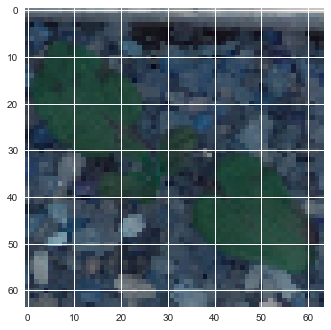

In [7]:
plt.imshow(images_per_class['Cleavers'][1])

In [8]:
img   = images_per_class['Cleavers'][1]

In [9]:
resized_image = cv2.resize(img, (100, 100)) 

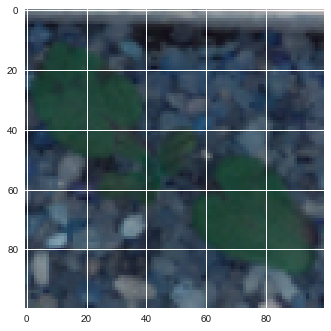

In [10]:
plt.imshow(resized_image)

In [11]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

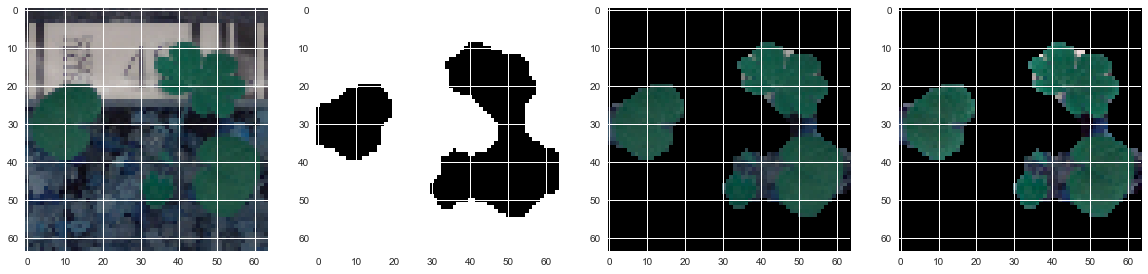

In [12]:
# Test image to see the changes
image = images_per_class["Small-flowered Cranesbill"][97]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

In [13]:

mask_collection = []

for class_label in images_per_class.keys():
    for image in images_per_class[class_label]:
        mask = create_mask_for_plant(image)
        mask = np.ravel(mask)
        mask_collection.append(mask)

In [14]:
mask_collection

[array([255, 255, 255, ...,   0,   0,   0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([255, 255, 255, ...,   0,   0,   0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([255, 255, 255, ...,   0,   0,   0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [15]:
df = pd.DataFrame(mask_collection)

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
label_record = []

In [18]:
image_record = []

In [19]:
for class_label in images_per_class.keys():
    for image in images_per_class[class_label]:
        image = np.ravel(image)
        image_record.append(image)
        label_record.append(class_label)

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(label_record)

LabelEncoder()

In [21]:
y_train = le.transform(label_record)

In [22]:
x_train = df

# test data

In [48]:
images_per_test = {}
class_folder_name = 'test'

images_per_test[class_folder_name] = []




In [49]:
class_folder_path = './test'

In [50]:
glob(os.path.join(class_folder_path, "*.png"))

['./test/1b490196c.png',
 './test/85431c075.png',
 './test/506347cfe.png',
 './test/7f46a71db.png',
 './test/668c1007c.png',
 './test/71f5323c5.png',
 './test/1f3f44563.png',
 './test/beebe5f4e.png',
 './test/780defa2e.png',
 './test/df521c0c0.png',
 './test/466bb6d3b.png',
 './test/98d819587.png',
 './test/223e4af09.png',
 './test/abc331628.png',
 './test/eef131644.png',
 './test/b7a7f6390.png',
 './test/7d3045fc3.png',
 './test/1926e82fd.png',
 './test/a9d2eab61.png',
 './test/bffc08672.png',
 './test/6dd095129.png',
 './test/6db684fff.png',
 './test/cec5bf198.png',
 './test/bea23d9f8.png',
 './test/48d97c645.png',
 './test/31f3dd81f.png',
 './test/5b63dcc21.png',
 './test/b4c3df835.png',
 './test/3abb502fb.png',
 './test/54b3afd58.png',
 './test/550a8b7e6.png',
 './test/8585f9718.png',
 './test/e478c452c.png',
 './test/25a4c427e.png',
 './test/39b740f7e.png',
 './test/0021e90e4.png',
 './test/9c32a797e.png',
 './test/958bb9e96.png',
 './test/bd789d151.png',
 './test/e19ad6ac9.png',


In [51]:
filename = []

for image_path in glob(os.path.join(class_folder_path, "*.png")):
    image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image_bgr = cv2.resize(image_bgr, (64, 64)) 
    print(image_bgr)
    print(image_path.split('/')[2])
    images_per_test[class_folder_name].append(image_bgr)
    filename.append(image_path.split('/')[2])



[[[ 39  62  83]
  [ 40  61  85]
  [ 46  66  90]
  ..., 
  [ 30  34  61]
  [ 35  42  68]
  [ 86  94 106]]

 [[ 31  56  76]
  [ 40  60  80]
  [ 44  65  93]
  ..., 
  [ 49  61  78]
  [ 37  48  66]
  [ 40  52  73]]

 [[ 51  66  87]
  [ 38  53  77]
  [ 63  82 105]
  ..., 
  [ 46  54  73]
  [ 29  36  57]
  [ 37  48  68]]

 ..., 
 [[ 66  87 108]
  [ 45  72 100]
  [ 43  65  89]
  ..., 
  [ 72  86 104]
  [ 74  91 103]
  [ 58  79  97]]

 [[ 57  80 108]
  [ 40  69 101]
  [ 32  56  85]
  ..., 
  [ 72  90 102]
  [ 76  92 103]
  [ 47  69  93]]

 [[ 43  65  88]
  [ 33  60  89]
  [ 40  60  88]
  ..., 
  [ 67  86  99]
  [ 67  87 103]
  [ 54  76 100]]]
1b490196c.png
[[[ 47  74  93]
  [ 49  76  94]
  [ 47  68  86]
  ..., 
  [ 33  59  81]
  [ 77 110 136]
  [ 84 112 137]]

 [[ 47  71  88]
  [ 46  70  86]
  [ 50  70  86]
  ..., 
  [ 51  82 108]
  [ 84 116 145]
  [ 75 102 127]]

 [[ 59  79  97]
  [ 49  68  85]
  [ 61  81  97]
  ..., 
  [ 71 100 128]
  [ 82 112 140]
  [ 75  95 117]]

 ..., 
 [[ 56  71  88]
  

[[[61 77 92]
  [53 69 88]
  [32 41 59]
  ..., 
  [53 66 81]
  [70 82 96]
  [40 51 70]]

 [[43 56 67]
  [44 54 69]
  [21 30 47]
  ..., 
  [55 68 84]
  [49 61 76]
  [45 56 76]]

 [[61 70 81]
  [61 69 80]
  [50 60 68]
  ..., 
  [58 73 90]
  [55 68 86]
  [49 66 79]]

 ..., 
 [[77 87 94]
  [69 75 84]
  [26 35 46]
  ..., 
  [68 81 94]
  [34 40 53]
  [40 47 67]]

 [[69 79 87]
  [83 90 97]
  [67 78 90]
  ..., 
  [54 58 78]
  [71 73 94]
  [60 61 77]]

 [[70 81 93]
  [80 86 98]
  [76 85 96]
  ..., 
  [56 61 79]
  [68 67 82]
  [68 65 82]]]
377283a21.png
[[[ 55  71  92]
  [ 66  83  97]
  [ 62  82  98]
  ..., 
  [114 126 133]
  [104 118 124]
  [ 88  96 107]]

 [[ 65  83 101]
  [ 72  90 105]
  [ 60  83  99]
  ..., 
  [120 131 137]
  [106 116 127]
  [104 115 124]]

 [[ 89 105 119]
  [ 70  87 104]
  [ 65  86 102]
  ..., 
  [142 151 155]
  [112 122 130]
  [109 117 126]]

 ..., 
 [[ 54  85 112]
  [ 46  77 108]
  [ 70  93 118]
  ..., 
  [ 96 113 130]
  [ 88 108 124]
  [ 73  94 112]]

 [[ 55  92 119]
  [ 

[[[ 42  64  83]
  [ 50  74  92]
  [ 33  46  62]
  ..., 
  [ 29  38  52]
  [ 42  51  69]
  [ 30  38  51]]

 [[ 44  59  79]
  [ 55  71  85]
  [ 17  21  30]
  ..., 
  [ 52  67  77]
  [ 45  59  78]
  [ 47  63  78]]

 [[ 42  52  64]
  [ 19  19  28]
  [ 25  30  40]
  ..., 
  [ 57  73  84]
  [ 45  58  71]
  [ 45  62  76]]

 ..., 
 [[ 45  75 102]
  [ 71  92 108]
  [ 45  69  91]
  ..., 
  [ 47  60  82]
  [ 44  58  80]
  [ 38  61  83]]

 [[ 55  92 124]
  [ 66  90 111]
  [ 42  65  93]
  ..., 
  [ 35  55  79]
  [ 60  82 102]
  [ 59  83 107]]

 [[ 41  74 111]
  [ 39  57  84]
  [ 18  43  69]
  ..., 
  [ 49  79 108]
  [ 53  86 112]
  [ 56  87 115]]]
ffc6f8527.png
[[[ 61  81  96]
  [ 63  82  98]
  [ 59  78  96]
  ..., 
  [107 102 106]
  [100  94  99]
  [105  99 102]]

 [[ 69  88 103]
  [ 61  82 100]
  [ 42  77 107]
  ..., 
  [102  96 100]
  [107 103 105]
  [107 101 105]]

 [[ 57  78  94]
  [ 48  70  95]
  [ 40  79 109]
  ..., 
  [108 101 104]
  [104 102 104]
  [101  98 105]]

 ..., 
 [[ 41  63 109]
  

[[[34 54 73]
  [30 51 72]
  [37 56 71]
  ..., 
  [47 61 76]
  [42 57 72]
  [43 59 79]]

 [[42 59 75]
  [45 63 80]
  [36 58 75]
  ..., 
  [48 62 77]
  [40 59 74]
  [40 58 77]]

 [[51 65 84]
  [33 54 79]
  [36 62 88]
  ..., 
  [45 61 76]
  [38 56 76]
  [52 67 84]]

 ..., 
 [[68 74 82]
  [69 75 86]
  [43 53 72]
  ..., 
  [32 42 58]
  [29 33 44]
  [32 32 41]]

 [[75 84 93]
  [77 82 91]
  [63 71 84]
  ..., 
  [37 48 63]
  [27 27 38]
  [33 32 41]]

 [[67 76 87]
  [80 88 97]
  [76 85 89]
  ..., 
  [51 67 80]
  [24 34 42]
  [30 31 40]]]
ac3193f78.png
[[[187 177 175]
  [184 174 171]
  [181 170 166]
  ..., 
  [183 176 169]
  [184 175 170]
  [182 172 169]]

 [[187 176 175]
  [185 177 173]
  [187 176 171]
  ..., 
  [186 178 172]
  [186 175 174]
  [183 174 171]]

 [[186 177 174]
  [186 177 174]
  [187 177 174]
  ..., 
  [186 177 173]
  [187 177 173]
  [185 175 172]]

 ..., 
 [[ 43  59  80]
  [ 45  58  73]
  [ 41  57  74]
  ..., 
  [ 69  86 101]
  [ 70  86 102]
  [ 59  84 100]]

 [[ 38  54  73]
  [ 

[[[ 36  48  72]
  [ 42  47  65]
  [ 39  47  63]
  ..., 
  [ 79  92 103]
  [ 71  81  94]
  [ 71  81  93]]

 [[ 59  80  96]
  [ 32  47  67]
  [ 31  44  59]
  ..., 
  [ 74  86  94]
  [ 78  88  98]
  [ 68  78  91]]

 [[ 74  93 110]
  [ 62  75  88]
  [ 34  47  67]
  ..., 
  [ 76  88  94]
  [ 75  84  94]
  [ 66  75  91]]

 ..., 
 [[ 54  80  94]
  [ 58  85 103]
  [ 40  61  81]
  ..., 
  [ 19  33  63]
  [ 21  32  64]
  [ 23  35  69]]

 [[ 51  71  89]
  [ 51  71  92]
  [ 51  72  94]
  ..., 
  [ 38  55  77]
  [ 49  67  85]
  [ 57  78  94]]

 [[ 53  75  89]
  [ 45  67  80]
  [ 41  69  87]
  ..., 
  [ 54  72  90]
  [ 58  76  94]
  [ 57  84  96]]]
9aa5587fe.png
[[[150 144 140]
  [132 126 129]
  [ 97  87 106]
  ..., 
  [193 184 182]
  [191 181 177]
  [188 178 175]]

 [[169 166 156]
  [ 98  93 103]
  [142 133 136]
  ..., 
  [189 183 177]
  [191 182 179]
  [187 179 176]]

 [[157 153 151]
  [ 85  80  98]
  [169 164 160]
  ..., 
  [192 183 178]
  [190 183 177]
  [190 181 175]]

 ..., 
 [[ 41  50  67]
  

[[[ 79  95 104]
  [ 89 101 113]
  [ 87  98 112]
  ..., 
  [ 84 101 111]
  [ 75  91 107]
  [ 68  85 101]]

 [[ 77  91 103]
  [ 91 105 117]
  [ 93 111 121]
  ..., 
  [ 82  98 111]
  [ 75  91 105]
  [ 67  84  97]]

 [[ 80  94 102]
  [ 83  96 108]
  [ 83  97 110]
  ..., 
  [ 55  72  89]
  [ 58  79  91]
  [ 66  82  97]]

 ..., 
 [[ 45  59  72]
  [ 23  33  52]
  [ 24  34  54]
  ..., 
  [ 57  72  87]
  [ 53  69  82]
  [ 69  85  96]]

 [[ 60  77  84]
  [ 39  52  67]
  [ 55  74  86]
  ..., 
  [ 66  78  94]
  [ 55  72  82]
  [ 46  56  77]]

 [[ 56  72  82]
  [ 44  62  78]
  [ 60  81  97]
  ..., 
  [ 60  73  89]
  [ 54  69  81]
  [ 47  57  78]]]
3dd52bd2a.png
[[[ 79  91  97]
  [ 79  89  98]
  [ 81  91 103]
  ..., 
  [ 87  96 111]
  [ 85  95 108]
  [ 87  98 110]]

 [[ 63  71  81]
  [ 58  66  81]
  [ 66  78  91]
  ..., 
  [ 75  86  99]
  [ 75  88  98]
  [ 79  92 101]]

 [[ 16  12  32]
  [ 15  16  34]
  [ 25  28  43]
  ..., 
  [ 58  68  81]
  [ 57  65  79]
  [ 55  68  80]]

 ..., 
 [[ 65  77  91]
  

[[[ 62  85 108]
  [ 55  79  99]
  [ 51  75  98]
  ..., 
  [ 21  29  39]
  [ 21  31  40]
  [ 44  58  64]]

 [[ 58  77 103]
  [ 65  84 105]
  [ 49  74  98]
  ..., 
  [ 14  22  31]
  [ 21  29  37]
  [ 17  27  34]]

 [[ 50  75  97]
  [ 62  83 100]
  [ 69  92 110]
  ..., 
  [ 37  49  63]
  [ 22  28  42]
  [ 29  37  46]]

 ..., 
 [[ 44  62  79]
  [ 45  61  78]
  [ 64  72  83]
  ..., 
  [ 62  75  86]
  [ 61  73  83]
  [ 57  68  76]]

 [[ 46  64  80]
  [ 45  63  80]
  [ 59  71  82]
  ..., 
  [ 45  62  75]
  [ 48  58  69]
  [ 57  67  78]]

 [[ 44  63  77]
  [ 42  61  77]
  [ 43  60  73]
  ..., 
  [ 35  49  59]
  [ 40  47  56]
  [ 45  52  60]]]
55fed435f.png
[[[ 54  82 101]
  [ 62  90 107]
  [ 54  85 102]
  ..., 
  [ 81  76  78]
  [ 74  70  78]
  [ 76  74  79]]

 [[ 32  58  85]
  [ 45  72  92]
  [ 60  86 103]
  ..., 
  [ 74  72  73]
  [ 76  73  74]
  [ 70  68  75]]

 [[ 39  56  79]
  [ 34  54  71]
  [ 36  58  82]
  ..., 
  [122 118 114]
  [116 109 104]
  [103  95  99]]

 ..., 
 [[ 60  71  81]
  

[[[ 27  53  85]
  [ 30  61  88]
  [ 20  50  83]
  ..., 
  [ 62  84  84]
  [ 79  90  93]
  [ 95 100 106]]

 [[ 23  43  71]
  [ 23  54  82]
  [ 21  49  81]
  ..., 
  [ 92 103 103]
  [ 90  98 102]
  [ 90  99 102]]

 [[ 31  43  63]
  [ 25  43  69]
  [ 25  43  72]
  ..., 
  [ 90  98 106]
  [ 90  99 102]
  [ 73  87  88]]

 ..., 
 [[ 67  81  90]
  [ 63  80  85]
  [ 45  70  71]
  ..., 
  [ 28  41  55]
  [ 26  37  54]
  [ 47  58  71]]

 [[ 77  92 106]
  [ 72  89 100]
  [ 66  87  96]
  ..., 
  [ 33  46  64]
  [ 34  47  68]
  [ 51  64  78]]

 [[ 68  83  98]
  [ 68  85  96]
  [ 68  87  99]
  ..., 
  [ 50  70  84]
  [ 53  73  89]
  [ 58  78  94]]]
a935ca110.png
[[[ 32  54  81]
  [ 55  82 104]
  [ 68  96 119]
  ..., 
  [ 36  29  47]
  [ 26  48  63]
  [ 47  76  93]]

 [[ 22  27  40]
  [ 60  84 102]
  [ 67  92 109]
  ..., 
  [ 34  70  78]
  [ 25  55  67]
  [ 41  67  84]]

 [[ 29  28  45]
  [ 61  79 100]
  [ 70  93 112]
  ..., 
  [ 38  72  79]
  [ 42  74  82]
  [ 36  68  81]]

 ..., 
 [[ 57  80  99]
  

e15472085.png
[[[ 95 104 110]
  [ 93 102 107]
  [100 108 117]
  ..., 
  [185 179 174]
  [175 170 162]
  [ 84  79  83]]

 [[ 73  85  96]
  [ 75  90  98]
  [ 76  88  98]
  ..., 
  [184 179 174]
  [172 169 164]
  [ 83  77  83]]

 [[ 32  35  55]
  [ 42  50  65]
  [ 27  32  52]
  ..., 
  [175 172 168]
  [168 165 161]
  [ 73  72  75]]

 ..., 
 [[ 30  46  68]
  [ 41  55  76]
  [ 50  62  83]
  ..., 
  [ 89 104 116]
  [ 82 100 113]
  [ 74  88 108]]

 [[ 33  53  78]
  [ 28  46  72]
  [ 22  38  68]
  ..., 
  [ 83  97 112]
  [ 80  93 109]
  [ 72  81  99]]

 [[ 38  57  82]
  [ 37  58  83]
  [ 27  50  78]
  ..., 
  [ 78  90 109]
  [ 69  78  97]
  [ 72  85  96]]]
37c3108d6.png
[[[ 68  83  97]
  [ 71  86 102]
  [ 64  82 100]
  ..., 
  [ 71  88 100]
  [ 75  95 106]
  [ 74  94 110]]

 [[ 43  59  80]
  [ 65  81  94]
  [ 60  76  98]
  ..., 
  [ 35  45  64]
  [ 76  94 108]
  [ 80  98 112]]

 [[ 71  93 110]
  [ 48  68  90]
  [ 84 105 115]
  ..., 
  [ 38  49  69]
  [ 41  48  72]
  [ 77  99 110]]

 ..., 
 [[ 

[[[ 47  46  59]
  [ 49  49  60]
  [ 60  59  72]
  ..., 
  [ 35  56  78]
  [ 38  57  84]
  [ 35  56  83]]

 [[ 44  44  56]
  [ 45  46  55]
  [ 57  56  69]
  ..., 
  [ 62  83 103]
  [ 42  61  85]
  [ 52  76  96]]

 [[ 44  44  58]
  [ 49  51  62]
  [ 59  60  71]
  ..., 
  [ 60  80 101]
  [ 54  77  98]
  [ 51  77  98]]

 ..., 
 [[ 49  51  65]
  [144 142 136]
  [143 138 136]
  ..., 
  [ 58  76  94]
  [ 63  80  98]
  [ 56  72  92]]

 [[ 64  66  77]
  [155 154 148]
  [163 157 152]
  ..., 
  [ 63  83 102]
  [ 52  70  90]
  [ 55  72  91]]

 [[ 74  77  83]
  [118 115 120]
  [124 121 126]
  ..., 
  [ 71  88 105]
  [ 65  80 101]
  [ 59  78  97]]]
2a667e099.png
[[[102 117 126]
  [ 89 101 114]
  [ 87 107 125]
  ..., 
  [ 70  89 112]
  [ 59  83 105]
  [ 45  67  93]]

 [[ 88 106 118]
  [ 96 109 120]
  [ 94 110 124]
  ..., 
  [ 64  80 102]
  [ 51  70  91]
  [ 50  68  86]]

 [[ 74  94 112]
  [ 83 101 112]
  [ 80  98 110]
  ..., 
  [ 49  62  86]
  [ 65  81  97]
  [ 72  85  99]]

 ..., 
 [[ 52  62  75]
  

[[[186 186 184]
  [187 187 186]
  [181 180 180]
  ..., 
  [ 78  72  76]
  [150 145 143]
  [173 168 162]]

 [[189 187 188]
  [190 188 187]
  [186 186 186]
  ..., 
  [ 76  74  78]
  [149 144 144]
  [173 166 161]]

 [[190 189 189]
  [192 192 189]
  [189 188 187]
  ..., 
  [ 71  69  76]
  [152 145 145]
  [173 167 162]]

 ..., 
 [[ 27  31  44]
  [ 59  71  80]
  [ 63  76  88]
  ..., 
  [ 53  66  77]
  [ 49  57  68]
  [ 41  41  45]]

 [[ 25  29  44]
  [ 44  56  66]
  [ 55  65  76]
  ..., 
  [ 19  29  43]
  [ 41  43  51]
  [ 38  37  44]]

 [[ 26  31  51]
  [ 36  49  64]
  [ 51  59  74]
  ..., 
  [ 40  52  67]
  [ 41  50  57]
  [ 42  57  76]]]
391dcd7fd.png
[[[ 25  26  29]
  [ 26  32  31]
  [ 40  53  55]
  ..., 
  [ 52  56  69]
  [ 63  72  89]
  [ 51  61  81]]

 [[ 25  26  30]
  [ 28  30  32]
  [ 30  40  43]
  ..., 
  [ 55  62  73]
  [ 65  72  87]
  [ 44  54  72]]

 [[ 39  34  42]
  [ 36  36  40]
  [ 46  62  71]
  ..., 
  [ 60  60  78]
  [ 53  58  77]
  [ 51  61  80]]

 ..., 
 [[ 61  79  93]
  

[[[ 30  39  63]
  [ 40  45  59]
  [ 40  49  60]
  ..., 
  [ 63  77  89]
  [ 61  75  85]
  [ 66  76  88]]

 [[ 42  48  63]
  [ 68  74  83]
  [ 60  69  78]
  ..., 
  [ 63  76  83]
  [ 56  69  80]
  [ 56  64  80]]

 [[ 57  60  71]
  [ 68  73  81]
  [ 61  65  78]
  ..., 
  [ 65  77  84]
  [ 31  38  59]
  [ 50  61  79]]

 ..., 
 [[163 158 152]
  [141 138 131]
  [ 68  61  70]
  ..., 
  [ 85  79  88]
  [161 158 150]
  [169 164 158]]

 [[165 157 150]
  [140 132 126]
  [ 74  63  71]
  ..., 
  [ 92  82  88]
  [155 147 140]
  [169 161 155]]

 [[165 156 147]
  [139 130 124]
  [ 69  61  66]
  ..., 
  [ 92  82  86]
  [162 156 147]
  [170 163 157]]]
59e1cea8d.png
[[[ 95  92 100]
  [ 95  92  99]
  [ 94  93 100]
  ..., 
  [ 84  82  90]
  [ 85  84  86]
  [ 86  83  86]]

 [[171 164 157]
  [172 167 160]
  [170 162 156]
  ..., 
  [ 86  81  92]
  [ 85  82  86]
  [ 85  81  82]]

 [[166 160 156]
  [165 160 159]
  [125 114 126]
  ..., 
  [ 90  84  95]
  [ 83  78  85]
  [ 83  79  81]]

 ..., 
 [[ 65  78  97]
  

[[[ 27  42  63]
  [ 49  65  80]
  [ 43  55  75]
  ..., 
  [ 24  35  58]
  [ 32  44  65]
  [ 44  55  69]]

 [[ 28  39  68]
  [ 24  35  61]
  [ 23  29  51]
  ..., 
  [ 33  38  60]
  [ 28  35  63]
  [ 34  46  64]]

 [[ 35  51  86]
  [ 48  63  88]
  [ 31  44  72]
  ..., 
  [ 30  37  61]
  [ 31  42  74]
  [ 26  35  59]]

 ..., 
 [[ 56  69  86]
  [ 57  71  90]
  [ 66  89 116]
  ..., 
  [ 60  75  87]
  [ 67  82  98]
  [ 81  94 107]]

 [[ 72  81  98]
  [ 61  78  96]
  [ 53  76 103]
  ..., 
  [ 61  77  95]
  [ 63  83 101]
  [ 73  93 110]]

 [[ 49  66  75]
  [ 36  48  65]
  [ 29  38  62]
  ..., 
  [ 77 100 112]
  [ 74 102 115]
  [ 79 103 117]]]
5bd71f445.png
[[[ 76  91 111]
  [ 69  85 108]
  [ 74 101 118]
  ..., 
  [ 52  71 102]
  [ 51  72  99]
  [ 60  81 107]]

 [[ 77  90 108]
  [ 64  81 101]
  [ 70  96 113]
  ..., 
  [ 64  77  96]
  [ 86 103 117]
  [ 79  93 109]]

 [[ 64  81 100]
  [ 67  86 106]
  [ 65  83 102]
  ..., 
  [ 72  91 108]
  [ 67  82 103]
  [ 66  79  97]]

 ..., 
 [[ 67  87 105]
  

[[[ 42  73 100]
  [ 50  79 109]
  [ 39  63  92]
  ..., 
  [143 159 167]
  [120 139 147]
  [118 139 145]]

 [[ 39  67  95]
  [ 46  79 109]
  [ 42  69  99]
  ..., 
  [119 134 145]
  [126 143 148]
  [112 131 136]]

 [[ 35  60  85]
  [ 50  80 106]
  [ 43  70  99]
  ..., 
  [122 137 146]
  [119 136 141]
  [ 75  97 113]]

 ..., 
 [[ 54  84  95]
  [ 48  74  87]
  [ 45  76  80]
  ..., 
  [ 46  69  91]
  [ 46  72  91]
  [ 44  66  87]]

 [[ 54  78  95]
  [ 50  68  87]
  [ 34  51  68]
  ..., 
  [ 46  69  93]
  [ 50  77  95]
  [ 40  62  82]]

 [[ 55  75  93]
  [ 58  76  90]
  [ 36  48  65]
  ..., 
  [ 53  77  98]
  [ 49  73  92]
  [ 18  43  67]]]
2d992d1fb.png
[[[46 64 90]
  [38 57 83]
  [23 51 81]
  ..., 
  [42 61 79]
  [40 59 74]
  [43 58 76]]

 [[29 55 85]
  [28 54 87]
  [30 54 86]
  ..., 
  [39 61 74]
  [45 65 77]
  [41 53 72]]

 [[50 72 99]
  [28 52 86]
  [46 62 87]
  ..., 
  [10 32 54]
  [32 48 68]
  [35 44 58]]

 ..., 
 [[43 59 77]
  [46 67 87]
  [50 73 93]
  ..., 
  [60 73 89]
  [56 70 89]

[[[ 90 102 115]
  [ 43  63  86]
  [ 44  71 100]
  ..., 
  [ 67  77  93]
  [ 68  80  95]
  [ 68  88 104]]

 [[114 126 136]
  [102 114 124]
  [ 55  68  83]
  ..., 
  [ 68  81  93]
  [ 60  75  86]
  [ 65  82  99]]

 [[109 119 130]
  [ 98 115 127]
  [ 49  68  80]
  ..., 
  [ 48  64  77]
  [ 60  73  83]
  [ 59  71  86]]

 ..., 
 [[ 44  61  78]
  [ 48  67  85]
  [ 25  33  49]
  ..., 
  [ 67  85 100]
  [ 60  78  96]
  [ 40  57  74]]

 [[ 43  61  80]
  [ 41  60  77]
  [ 35  47  63]
  ..., 
  [ 67  83  96]
  [ 60  75  93]
  [ 40  55  69]]

 [[ 39  60  76]
  [ 37  54  72]
  [ 41  51  66]
  ..., 
  [ 33  44  56]
  [ 34  45  54]
  [ 51  63  77]]]
b828443ff.png
[[[ 61  87 108]
  [ 56  84 106]
  [ 55  78  98]
  ..., 
  [ 25  36  53]
  [ 32  42  58]
  [ 30  44  63]]

 [[ 61  87 109]
  [ 57  87 109]
  [ 52  77 100]
  ..., 
  [ 25  32  48]
  [ 27  36  51]
  [ 39  48  59]]

 [[ 54  80 101]
  [ 42  68  92]
  [ 39  55  78]
  ..., 
  [ 33  39  54]
  [ 24  29  46]
  [ 19  29  46]]

 ..., 
 [[ 54  78 102]
  

[[[ 33  47  68]
  [ 55  71  87]
  [ 62  77  97]
  ..., 
  [107 132 149]
  [ 96 119 138]
  [ 56  71  89]]

 [[ 19  26  51]
  [ 48  68  78]
  [ 54  70  87]
  ..., 
  [ 99 123 135]
  [ 83 104 118]
  [ 48  61  81]]

 [[ 45  50  69]
  [ 49  62  78]
  [ 52  70  88]
  ..., 
  [ 57  75  96]
  [ 49  66  89]
  [ 45  61  81]]

 ..., 
 [[132 136 137]
  [134 140 139]
  [124 130 130]
  ..., 
  [ 66  75  82]
  [ 66  70  76]
  [ 60  65  71]]

 [[130 128 130]
  [126 129 127]
  [125 129 128]
  ..., 
  [ 91 101 108]
  [ 91  95 103]
  [ 90  98 103]]

 [[111 103 108]
  [ 95  90  93]
  [ 93  85  89]
  ..., 
  [111 115 122]
  [111 114 121]
  [120 122 126]]]
d17f48d3b.png
[[[ 44  72  66]
  [ 23  75  62]
  [ 20  71  60]
  ..., 
  [160 157 154]
  [112 108 116]
  [113 110 119]]

 [[ 27  75  66]
  [ 24  75  59]
  [ 31  63  58]
  ..., 
  [121 114 119]
  [172 168 166]
  [138 134 141]]

 [[ 22  74  61]
  [ 31  59  55]
  [ 37  49  57]
  ..., 
  [150 148 147]
  [162 158 157]
  [162 161 157]]

 ..., 
 [[ 52  62  74]
  

[[[ 55  48  57]
  [ 55  51  52]
  [ 63  57  63]
  ..., 
  [ 18  20  31]
  [ 26  30  43]
  [ 18  24  33]]

 [[151 143 138]
  [149 143 135]
  [152 144 138]
  ..., 
  [ 15  12  27]
  [ 29  28  37]
  [ 12  12  25]]

 [[156 151 145]
  [156 150 145]
  [156 150 145]
  ..., 
  [ 21  20  28]
  [ 20  19  24]
  [ 25  25  30]]

 ..., 
 [[ 67  63  66]
  [ 68  64  62]
  [ 70  65  66]
  ..., 
  [ 17  15  25]
  [ 16  22  32]
  [ 38  51  57]]

 [[111 100  96]
  [107  95  91]
  [107  98  95]
  ..., 
  [ 20  19  26]
  [ 24  24  32]
  [ 19  27  39]]

 [[168 158 151]
  [166 159 153]
  [167 159 151]
  ..., 
  [ 15  15  26]
  [ 13  16  23]
  [ 21  22  29]]]
502dff972.png
[[[105 126 134]
  [101 117 126]
  [ 83  98 111]
  ..., 
  [ 66  88 108]
  [ 68  88 110]
  [ 69  89 107]]

 [[110 127 132]
  [ 92 106 118]
  [ 80  95 106]
  ..., 
  [ 58  81 100]
  [ 62  85 101]
  [ 57  76  94]]

 [[ 80  95 108]
  [ 71  89 106]
  [ 55  71  87]
  ..., 
  [ 59  81 101]
  [ 53  77  95]
  [ 24  35  57]]

 ..., 
 [[ 66  81  96]
  

[[[ 49  72  96]
  [ 49  74  95]
  [ 56  80 101]
  ..., 
  [ 83  98 114]
  [ 79  96 109]
  [ 78  95 114]]

 [[ 48  76  96]
  [ 51  74  97]
  [ 54  76  97]
  ..., 
  [ 68  90 105]
  [ 71  90 107]
  [ 68  86 105]]

 [[ 62  84 105]
  [ 46  70  94]
  [ 52  76  97]
  ..., 
  [ 45  58  79]
  [ 44  63  85]
  [ 41  62  88]]

 ..., 
 [[ 55  71  91]
  [ 30  43  68]
  [ 43  66  87]
  ..., 
  [ 74  93 112]
  [ 72  90 114]
  [ 69  92 113]]

 [[ 23  43  72]
  [ 31  50  79]
  [ 35  57  81]
  ..., 
  [ 70  91 111]
  [ 68  88 110]
  [ 64  88 113]]

 [[ 43  73  94]
  [ 42  67  93]
  [ 37  60  84]
  ..., 
  [ 66  90 109]
  [ 65  93 112]
  [ 57  84 109]]]
f8318faf1.png
[[[ 45  58  79]
  [ 58  72  82]
  [ 35  42  60]
  ..., 
  [ 88  98 109]
  [ 87  97 107]
  [ 68  79  91]]

 [[ 94 109 120]
  [ 77  88 106]
  [ 53  69  84]
  ..., 
  [ 83  94 107]
  [ 90 107 110]
  [ 31  31  52]]

 [[111 127 134]
  [ 99 115 125]
  [ 72  85  96]
  ..., 
  [ 84  94 101]
  [ 68  76  87]
  [ 28  26  48]]

 ..., 
 [[ 54  72  85]
  

In [52]:
images_per_test['test']

[array([[[ 39,  62,  83],
         [ 40,  61,  85],
         [ 46,  66,  90],
         ..., 
         [ 30,  34,  61],
         [ 35,  42,  68],
         [ 86,  94, 106]],
 
        [[ 31,  56,  76],
         [ 40,  60,  80],
         [ 44,  65,  93],
         ..., 
         [ 49,  61,  78],
         [ 37,  48,  66],
         [ 40,  52,  73]],
 
        [[ 51,  66,  87],
         [ 38,  53,  77],
         [ 63,  82, 105],
         ..., 
         [ 46,  54,  73],
         [ 29,  36,  57],
         [ 37,  48,  68]],
 
        ..., 
        [[ 66,  87, 108],
         [ 45,  72, 100],
         [ 43,  65,  89],
         ..., 
         [ 72,  86, 104],
         [ 74,  91, 103],
         [ 58,  79,  97]],
 
        [[ 57,  80, 108],
         [ 40,  69, 101],
         [ 32,  56,  85],
         ..., 
         [ 72,  90, 102],
         [ 76,  92, 103],
         [ 47,  69,  93]],
 
        [[ 43,  65,  88],
         [ 33,  60,  89],
         [ 40,  60,  88],
         ..., 
         [ 67,  86,  99

In [53]:

mask_collection_test = []
class_label = 'test'

for image in images_per_test[class_label]:
    mask = create_mask_for_plant(image)
    mask = np.ravel(mask)
    mask_collection_test.append(mask)

In [54]:
df_test = pd.DataFrame(mask_collection_test)

In [55]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df_test.tail()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
793,0,0,0,0,0,0,0,0,255,255,...,255,255,0,0,0,0,0,0,0,0


In [57]:
x_test = df_test

#  ML from here

In [23]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

/Users/takuyasakaguchi/anaconda/envs/python36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_train, random_state=0)
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.59343434343434343

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train, random_state=0)
gbt = GradientBoostingClassifier(max_depth=4, n_estimators=20)
gbt.fit(Xtrain, ytrain)
ypred = gbt.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.47558922558922556

In [27]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_train, random_state=0)
clf = RandomForestClassifier(n_estimators=200, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.58417508417508412

In [28]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_train, random_state=0)
clf = RandomForestClassifier(n_estimators=50, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.55808080808080807

In [29]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_train, random_state=0)
clf = RandomForestClassifier(n_estimators=110, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.58922558922558921

In [30]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_train, random_state=0)
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.59343434343434343

In [58]:
prediction = clf.predict(x_test)

In [59]:
prediction

array([ 9,  6,  2,  5,  1,  6,  7,  8,  3,  6,  7,  1,  2,  6,  6,  5,  5,
        6,  6, 10,  1,  3,  3,  8, 10,  6,  5,  8,  6, 10, 10,  6, 11,  6,
        6, 10,  6,  1,  3, 10,  3,  5,  5,  3,  3,  2, 10, 10,  1,  5,  8,
        8,  6,  8,  4,  6,  5, 11,  8,  6,  8,  6,  3,  1, 10,  8, 11,  6,
       10,  5,  1,  3,  1,  3,  3, 10,  3, 10,  6,  6,  6,  1,  2,  1, 11,
        1,  5,  3,  7, 10,  3,  8,  6,  6,  5, 10,  6,  6,  5,  6,  7,  6,
        5,  6,  2,  3,  3,  1, 11,  9,  5,  3,  3,  6,  1,  1,  6,  1,  6,
        6,  3,  8,  8,  8,  6,  1,  8,  1,  8,  9,  9,  5,  1,  6,  2, 11,
        6,  6,  6,  5,  3, 11,  3,  8,  3,  3,  6,  5, 10,  6,  3,  5,  5,
        1,  6,  5,  2,  6,  1, 10,  1,  3,  3,  5,  6,  6,  6,  8,  5, 10,
        1,  5,  5,  8,  7,  8,  9,  6, 11, 10,  6, 10,  1,  8,  6,  1, 10,
        3,  6, 11, 10,  3,  6,  3,  5,  3,  2,  6,  6,  3, 10,  9,  2, 10,
       10,  3,  2,  2,  9,  1,  3,  3,  6, 10, 11,  8, 11,  3,  3,  5,  6,
        6,  3,  3,  8,  5

In [60]:
prediction = le.inverse_transform(prediction)

In [61]:
prediction

array(['Shepherds Purse', 'Loose Silky-bent', 'Cleavers', 'Fat Hen',
       'Charlock', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed',
       'Common Chickweed', 'Loose Silky-bent', 'Maize', 'Charlock',
       'Cleavers', 'Loose Silky-bent', 'Loose Silky-bent', 'Fat Hen',
       'Fat Hen', 'Loose Silky-bent', 'Loose Silky-bent',
       'Small-flowered Cranesbill', 'Charlock', 'Common Chickweed',
       'Common Chickweed', 'Scentless Mayweed',
       'Small-flowered Cranesbill', 'Loose Silky-bent', 'Fat Hen',
       'Scentless Mayweed', 'Loose Silky-bent',
       'Small-flowered Cranesbill', 'Small-flowered Cranesbill',
       'Loose Silky-bent', 'Sugar beet', 'Loose Silky-bent',
       'Loose Silky-bent', 'Small-flowered Cranesbill', 'Loose Silky-bent',
       'Charlock', 'Common Chickweed', 'Small-flowered Cranesbill',
       'Common Chickweed', 'Fat Hen', 'Fat Hen', 'Common Chickweed',
       'Common Chickweed', 'Cleavers', 'Small-flowered Cranesbill',
       'Small-flowered Crane

In [62]:
df_submission = pd.read_csv('sample_submission-5.csv')

In [65]:
df_test['species']=prediction

In [66]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,species
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Shepherds Purse
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loose Silky-bent
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cleavers
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fat Hen
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Charlock


In [67]:
df_test['files'] = filename

In [68]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,species,files
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Shepherds Purse,1b490196c.png
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Loose Silky-bent,85431c075.png
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cleavers,506347cfe.png
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fat Hen,7f46a71db.png
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Charlock,668c1007c.png


In [70]:
df_test = df_test.sort_values('files')

In [71]:
df_test = df_test.reset_index(drop=True)

In [72]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,species,files
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Small-flowered Cranesbill,0021e90e4.png
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fat Hen,003d61042.png
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Sugar beet,007b3da8b.png
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Common Chickweed,0086a6340.png
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Common Chickweed,00c47e980.png


In [73]:
df_submission.head()

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet


In [74]:
df_submission.species = df_test.species

In [75]:
df_submission.head()

,file,species
0,0021e90e4.png,Small-flowered Cranesbill
1,003d61042.png,Fat Hen
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Common Chickweed
4,00c47e980.png,Common Chickweed


In [76]:
df_submission.to_csv('masked_submission1.csv', index = False)